# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


# 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

# 1. Data Validation
This data set has 947 rows, 8 columns. I have validated all variables and I have made several changes after validation: remove rows with null values in calories, carbohydrate, sugar, protein and replace null values in high_traffic with "Low".

- recipe: 947 unique identifiers without missing values (895 after dataset cleaning). No cleaning is needed.
- calories: 895 non-null values. I fill 52 missed values with the mean of the the column.
- carbohydrate: 895 non-null values. I fill 52 missed values with the mean of the column.
- sugar: 895 non-null values. I fill 52 missed values with the mean of the column.
- protein: 895 non-null values. I fill 52 missed values with the mean of the column.
- category: 11 unique values without missing values, whereas there were 10 values in the description. The extra valie is 'Chicken Breast'. I united it with the 'Chicken' value.
- servings: 6 unique values without missing values. By description, it should be numeric variable, but now it's character. Has two extra values: '4 as a snack' and '6 as a snack'. I united them with '4' and '6' and changed the column's type to integer.
- high_traffic: only 1 non-null value ("High"). Replaced null values with "Low".
- Missing values in the numerical columns (calories, carbohydrate, sugar, protein) were imputed with column means.
- The high_traffic column was binary encoded, and the category column was consolidated, merging 'Chicken Breast' into 'Chicken'.
- The servings column was cleaned to remove text and converted to an integer type.

In [1]:
# Data Validation and Preprocessing:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
# read and load data
df = pd.read_csv("recipe_site_traffic_2212.csv")
print(df.head())

   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]


In [2]:
# data inspection
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [3]:
# data inspection
print(df.describe())

           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    474.000000   288.550000     21.480000    4.550000   10.800000
75%    710.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000


In [4]:
# checking the row
print(df.columns)

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')


In [5]:
# the shape of the dataset
print(df.shape)
# checking missing value
print(df.isnull().sum())

(947, 8)
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [6]:
#check the unique values of 'category','servings', 'high_traffic'
for col in ['category','servings', 'high_traffic']:
    print('unique values of',col,df[col].unique())
    print('number of unique values of',col,df[col].nunique())
    print('--------')

unique values of category ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
number of unique values of category 11
--------
unique values of servings ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
number of unique values of servings 6
--------
unique values of high_traffic ['High' nan]
number of unique values of high_traffic 1
--------


In [7]:
#then replace 'Nan' in high_traffic with 0 and High with 1
df.high_traffic.replace(np.nan,'Low',inplace=True)
#verify the change
print('Unique values of high_traffic column',df.high_traffic.unique())
print('Number of unique values of high_traffic column',df.high_traffic.nunique())

Unique values of high_traffic column ['High' 'Low']
Number of unique values of high_traffic column 2


In [8]:
#replace 'Chicken Breast' in category with 'Chicken'
print('Unique values of category column before the change',df.category.unique())
df.category.replace('Chicken Breast','Chicken',inplace=True)
#verify the change
print('Unique values of high_traffic column after the change',df.category.unique())

Unique values of category column before the change ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
Unique values of high_traffic column after the change ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken'
 'Lunch/Snacks' 'Vegetable' 'Meat' 'Dessert']


In [9]:
#remove ' as a snack' from servings
df.servings=df.servings.str.replace(' as a snack','')
#verify the change
print('Unique values of servings column', df.servings.unique())
print('Number of unique values of servings column',df.servings.nunique())
#change servings type to int
df.servings=pd.to_numeric(df.servings).convert_dtypes() 
#verify the change
print('Type of servings column',df.servings.dtypes)

Unique values of servings column ['6' '4' '1' '2']
Number of unique values of servings column 4
Type of servings column Int64


In [10]:
# Replace missing values with the mean of the column
df['calories'].fillna(df['calories'].mean(), inplace=True)
df['carbohydrate'].fillna(df['carbohydrate'].mean(), inplace=True)
df['sugar'].fillna(df['sugar'].mean(), inplace=True)
df['protein'].fillna(df['protein'].mean(), inplace=True)

print(df)

     recipe     calories  carbohydrate  ...      category  servings high_traffic
0         1   435.939196     35.069676  ...          Pork         6         High
1         2    35.480000     38.560000  ...        Potato         4         High
2         3   914.280000     42.680000  ...     Breakfast         1          Low
3         4    97.030000     30.560000  ...     Beverages         4         High
4         5    27.050000      1.850000  ...     Beverages         4          Low
..      ...          ...           ...  ...           ...       ...          ...
942     943  1161.000000      5.310000  ...  Lunch/Snacks         2          Low
943     944   435.939196     35.069676  ...        Potato         2         High
944     945   951.740000     29.420000  ...          Pork         2         High
945     946   266.610000     35.770000  ...        Potato         6         High
946     947   184.560000     45.210000  ...     Beverages         4          Low

[947 rows x 8 columns]


In [11]:
# checking missing value after imputation
print(df.isnull().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


In [12]:
# check groups within category variables
for i in df.columns:
    print(df[i].value_counts())

1      1
637    1
625    1
626    1
627    1
      ..
320    1
321    1
322    1
323    1
947    1
Name: recipe, Length: 947, dtype: int64
435.939196    52
128.300000     2
47.890000      2
34.970000      2
529.260000     2
              ..
92.210000      1
472.910000     1
409.030000     1
31.750000      1
184.560000     1
Name: calories, Length: 892, dtype: int64
35.069676    52
3.460000      3
6.400000      3
9.580000      3
5.140000      3
             ..
66.640000     1
96.030000     1
0.860000      1
11.830000     1
45.210000     1
Name: carbohydrate, Length: 836, dtype: int64
9.046547     52
1.620000      5
1.510000      5
0.390000      4
1.100000      4
             ..
15.520000     1
13.220000     1
1.940000      1
2.910000      1
6.200000      1
Name: sugar, Length: 667, dtype: int64
24.149296     52
0.360000       6
1.190000       4
0.380000       4
0.240000       4
              ..
22.890000      1
169.780000     1
14.140000      1
15.080000      1
8.070000       1
Name: pr

In [13]:
# separate numeric columns
numeric = df.select_dtypes(include=np.number)
numeric

,recipe,calories,carbohydrate,sugar,protein,servings
0,1,435.939196,35.069676,9.046547,24.149296,6
1,2,35.480000,38.560000,0.660000,0.920000,4
2,3,914.280000,42.680000,3.090000,2.880000,1
3,4,97.030000,30.560000,38.630000,0.020000,4
4,5,27.050000,1.850000,0.800000,0.530000,4
...,...,...,...,...,...,...
942,943,1161.000000,5.310000,22.390000,44.220000,2
943,944,435.939196,35.069676,9.046547,24.149296,2
944,945,951.740000,29.420000,3.570000,13.870000,2
945,946,266.610000,35.770000,0.970000,8.070000,6


# 2. Exploratory Analysis:
- **Category Analysis:** The category variable has a notably higher frequency for 'Chicken', suggesting it may influence site traffic. By addressing this in your models, you may be able to predict high-traffic recipes more accurately.
- **Serving Size Analysis:** The servings variable suggests that recipes serving 4 are the most common. This could indicate a trend toward family-sized servings or recipes for small gatherings.
- **High Traffic Analysis:** There seems to be a connection between the recipe characteristics (like category, serving size) and high traffic, but it's not clear-cut, indicating a complex relationship that a good predictive model might uncover.
-  Correlation heatmap revealed relationships between numerical features.
- Histograms and bar plots were used to visualize the distribution of categories, servings, and high traffic.
- Pair plots and box plots explored relationships between nutritional content and high traffic.
- Certain categories, such as 'Chicken', have a higher frequency, possibly influencing traffic.
- Nutritional content shows varying patterns with high traffic, suggesting potential influences on user preferences.
- The category column indicates that chicken recipes are prevalent.
- Servings are mostly for 4 people, indicating a trend towards family-sized meals.
- The high_traffic column suggests a balanced dataset with a high traffic rate of approximately 60.61%.
- Correlation analysis shows interdependencies between the nutritional content of the recipes and the traffic they receive.

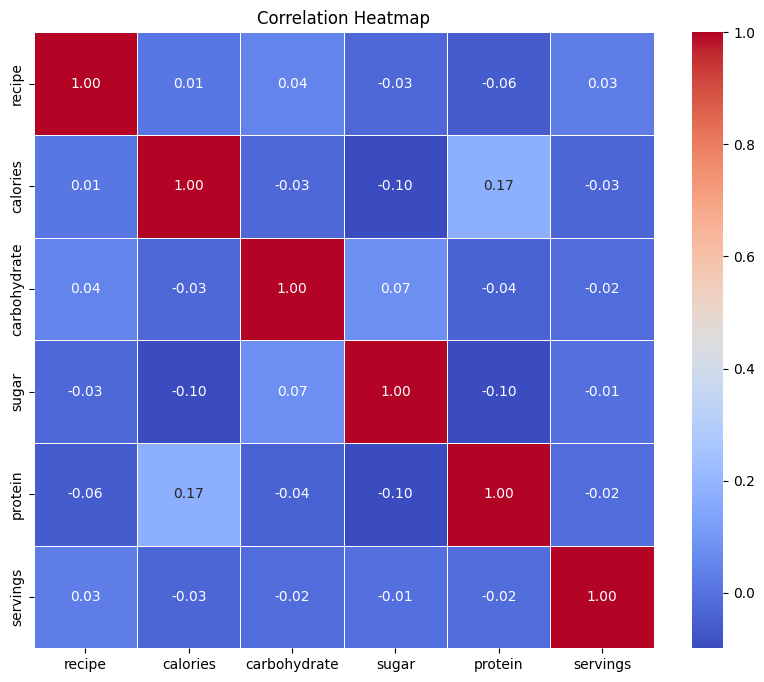

In [14]:
# Visualize the correlation matrix using a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

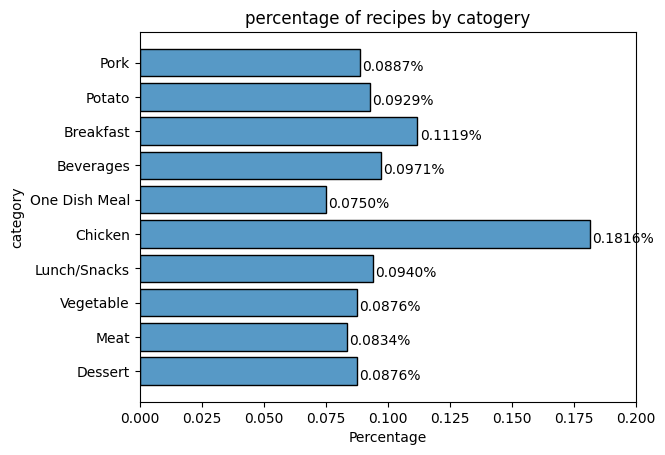

In [15]:
# show the percentage of each category
g=sns.histplot(data=df, y="category", bins=15, multiple="dodge",stat='density',discrete=True,shrink=.8)
# plt.xticks(rotation = 60)
plt.xticks(np.arange(0,0.225,0.025))
plt.title('percentage of recipes by catogery')
plt.xlabel('Percentage')
for p in g.patches:
    g.annotate(format(p.get_width(), '.4f')+'%',(p.get_width()+0.001,p.get_y() + p.get_height()*.8)) 
plt.show()

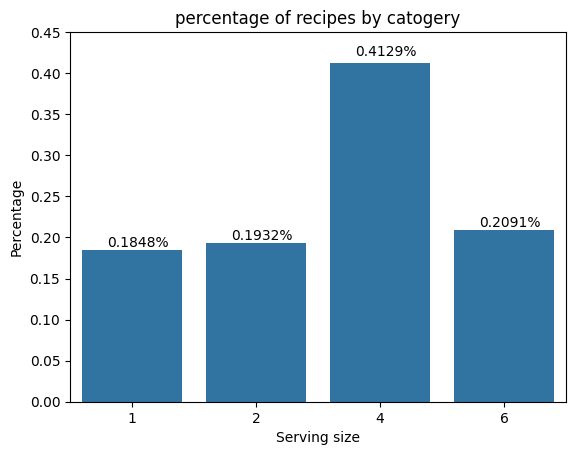

In [16]:
# check the percentage of each serving size
b=sns.barplot(x=df.servings.value_counts().index,y=df.servings.value_counts(normalize=True))
plt.yticks(np.arange(0,0.5,0.05))
for p in b.patches:
    b.annotate(format(p.get_height(), '.4f')+'%',(p.get_x() + p.get_width()*0.25,p.get_height()*1.02)) 
plt.title('percentage of recipes by catogery')
plt.ylabel('Percentage')
plt.xlabel('Serving size')
plt.show()

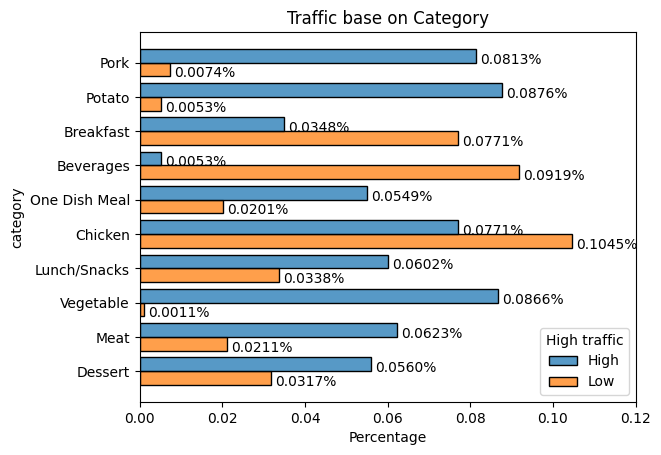

In [17]:
#we also show the percentage of each category in the high_traffic
ax=sns.histplot(data=df,y='category', hue="high_traffic",multiple="dodge",
                stat='density',discrete=True,shrink=.8)
sns.move_legend(ax, "lower right",title='High traffic')
plt.title('Traffic base on Category')
plt.xticks(np.arange(0,0.13,0.02))
plt.xlabel('Percentage')
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.4f')+'%',(bar.get_width()+0.001,bar.get_y() + 
                                                    bar.get_height()*1.05))
plt.show()

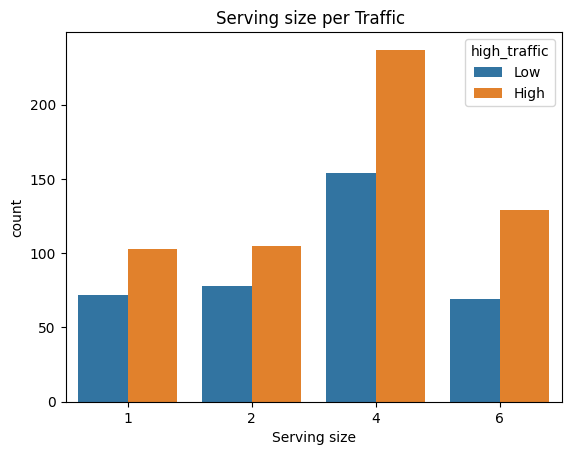

In [18]:
#we also check the relationship between #servings size and #high_traffic
sns.countplot(data=df, x='servings',hue='high_traffic', 
              order=df.servings.value_counts().sort_index().index)
plt.title('Serving size per Traffic ')
plt.xlabel('Serving size')
plt.show()

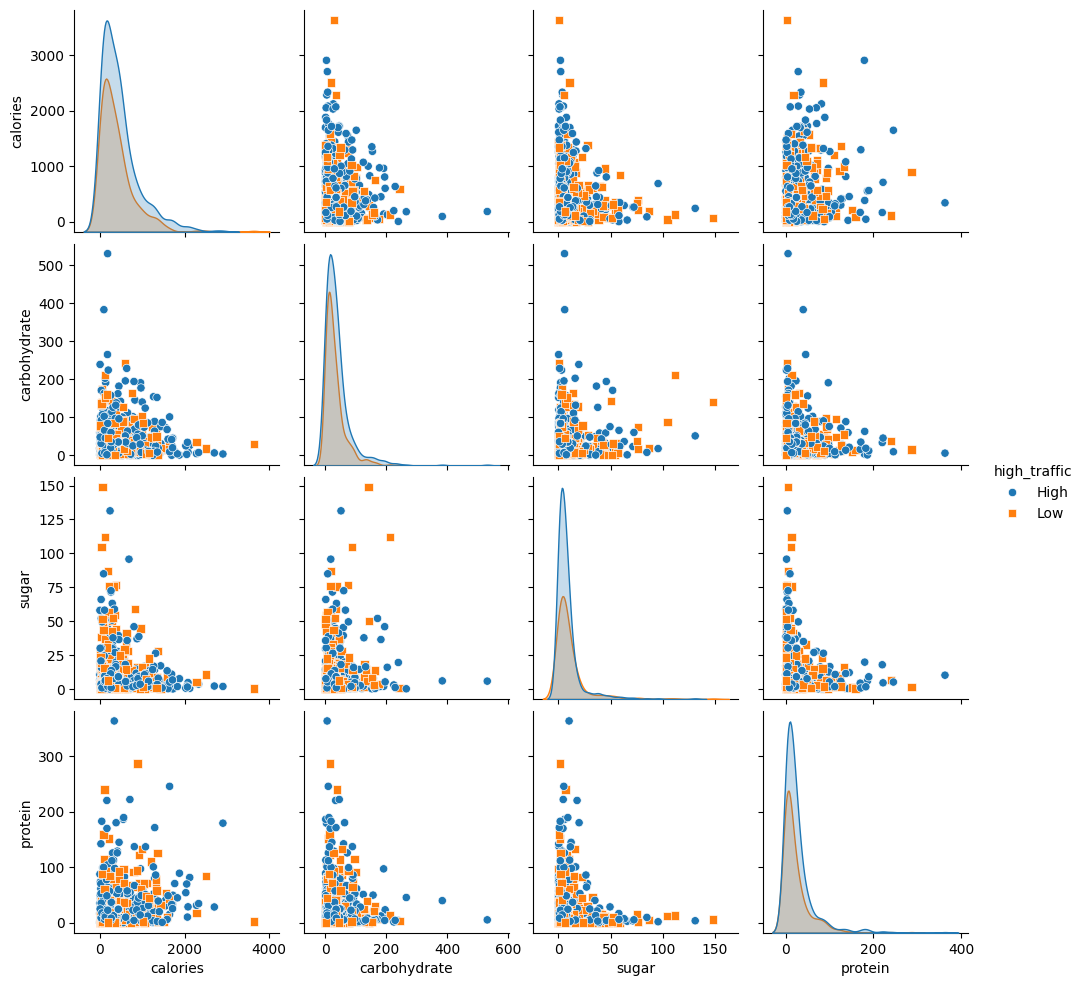

In [19]:
#Check weather their exists a #strong relationsip between 'calories', 'carbohydrate', 'sugar', 
#'protein' and "high_traffic" exist
sns.pairplot(df,vars =['calories', 'carbohydrate', 'sugar', 'protein'],
             hue = "high_traffic", markers=["o", "s"]);

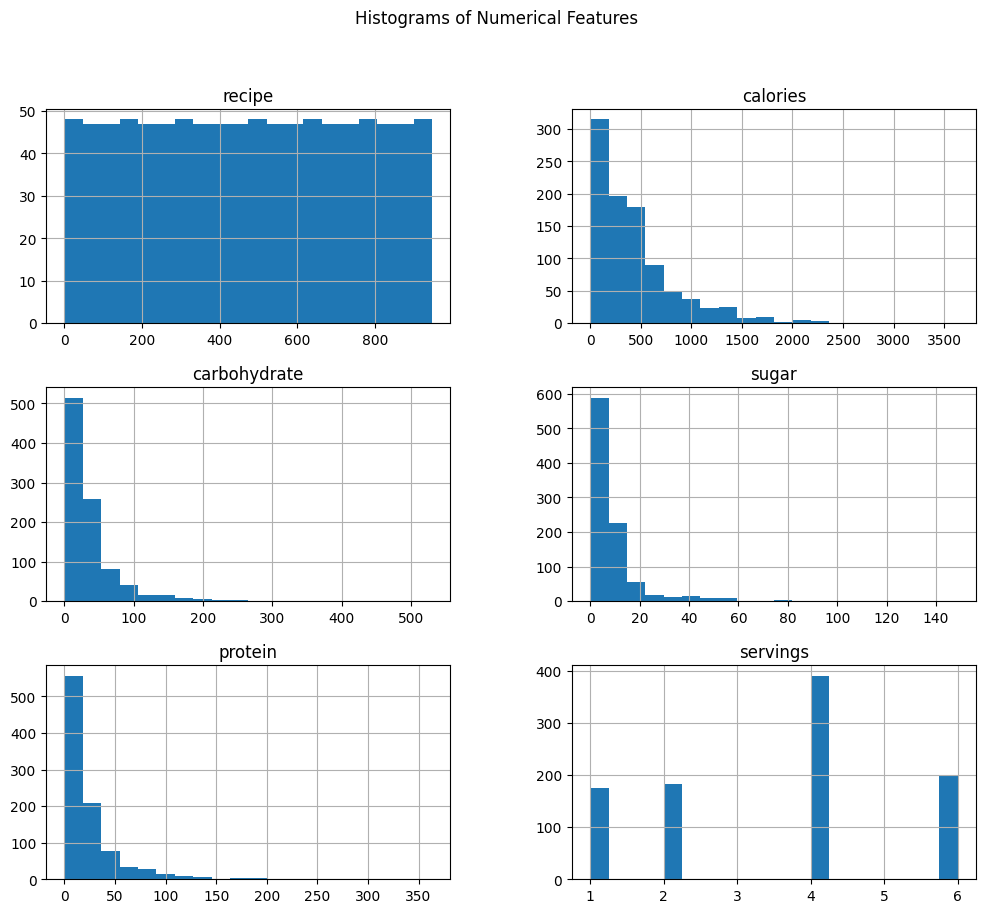

In [20]:
# Plot distribution of numerical features
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

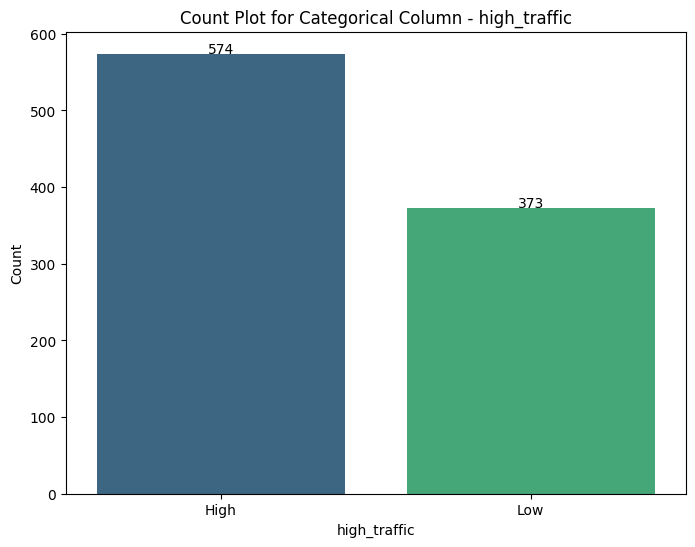

In [21]:
# Plotting using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.countplot(x='high_traffic', data=df, palette='viridis')  # You can choose a different color palette if desired
plt.title('Count Plot for Categorical Column - high_traffic')
plt.xlabel('high_traffic')
plt.ylabel('Count')

# Adding count labels on top of the bars
for count, patch in zip(df['high_traffic'].value_counts(), plt.gca().patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 0.1, f'{count}', ha='center', fontsize=10)

plt.show()

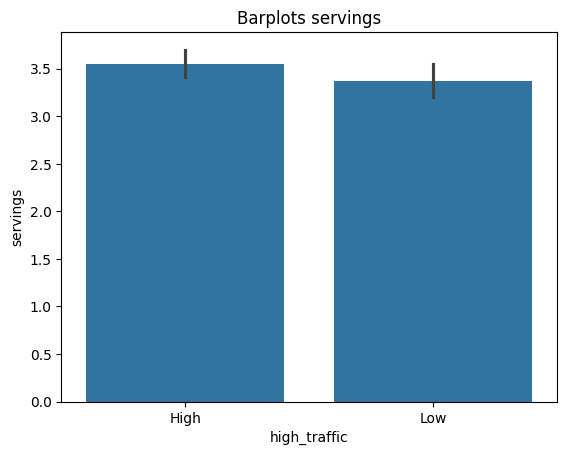

In [22]:
# check mean values high vs not high traffic
plt.title('Barplots servings')
plt.figsize=(15,15)
sns.barplot(y=df['servings'], x=df['high_traffic'])
plt.show()

<AxesSubplot: title={'center': 'Count plot (category)'}, xlabel='category', ylabel='count'>

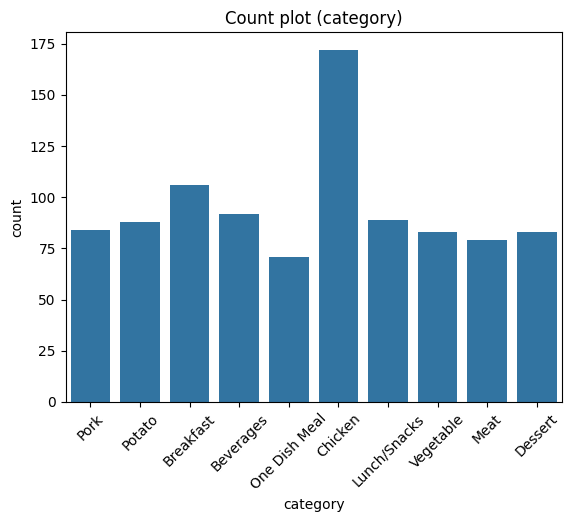

In [23]:
# check number of the categories
plt.title('Count plot (category)')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['category'])

<AxesSubplot: title={'center': 'Calories per category'}, xlabel='category', ylabel='calories'>

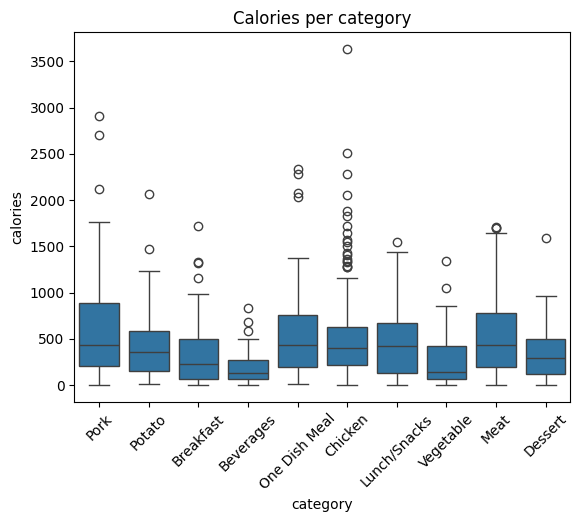

In [24]:
# check if categories and calories make sense
plt.title('Calories per category')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.boxplot(x=df['category'], y=df['calories'])

<AxesSubplot: title={'center': 'Count plot category by traffic'}, xlabel='category', ylabel='count'>

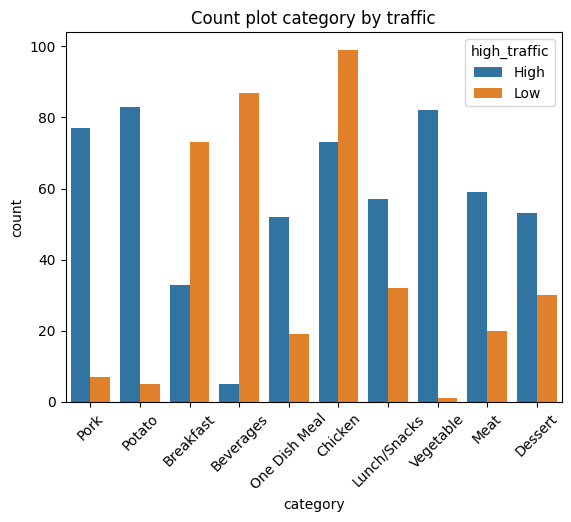

In [25]:
# get countplot to check relationship between high traffic and category
plt.title('Count plot category by traffic')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['category'].sort_values(ascending=False), hue =df['high_traffic'])

<AxesSubplot: title={'center': 'Servings per category'}, xlabel='category', ylabel='servings'>

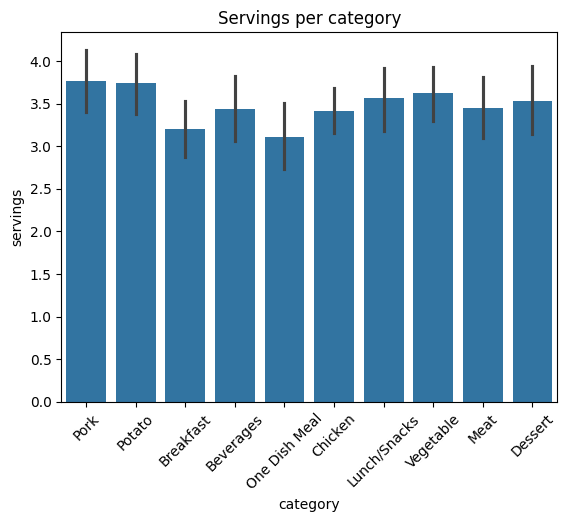

In [26]:
# check servings just for general view
plt.title('Servings per category')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.barplot(x=df['category'], y=df['servings'])

In [27]:
# in %
df['high_traffic'].value_counts(normalize=True)

High    0.606125
Low     0.393875
Name: high_traffic, dtype: float64

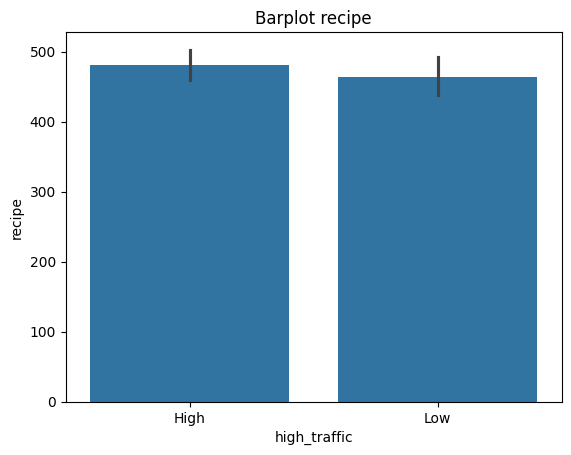

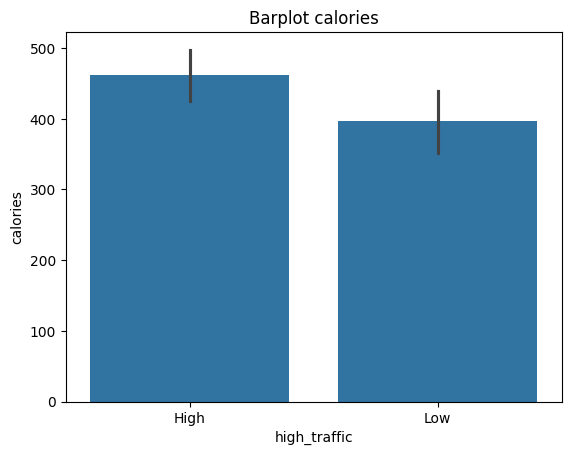

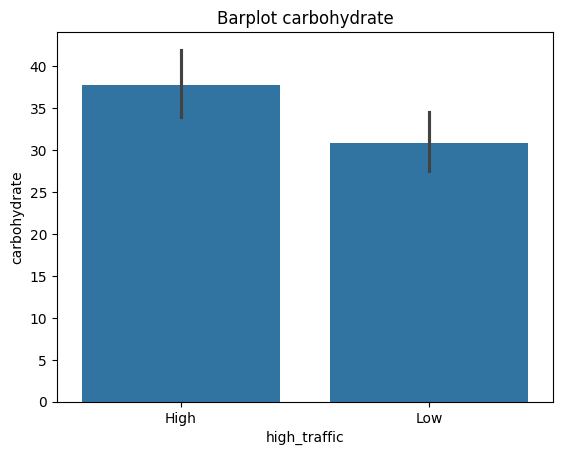

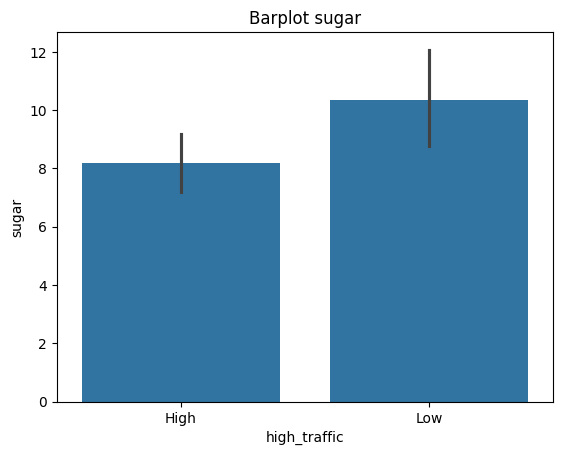

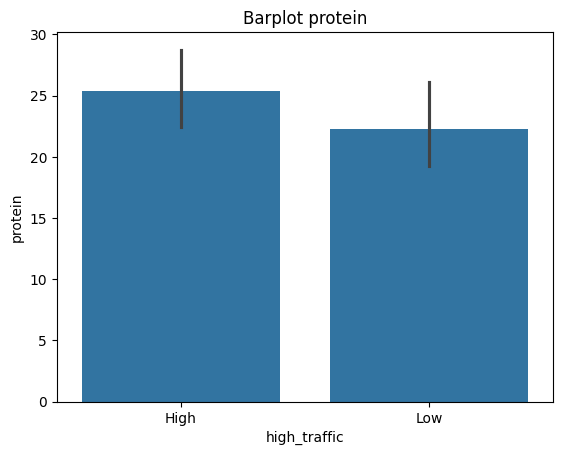

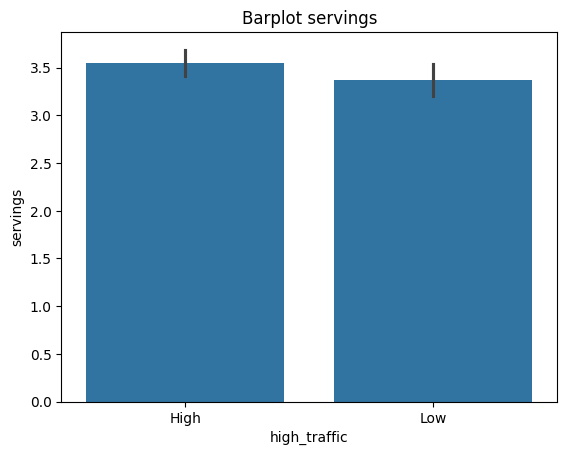

In [28]:
# plot high traffic against numeric variables
for i in numeric.columns:
    plt.title('Barplot %s'%i)
    plt.figsize=(15,15)
    sns.barplot(y=df[i], x=df['high_traffic'])
    plt.show()

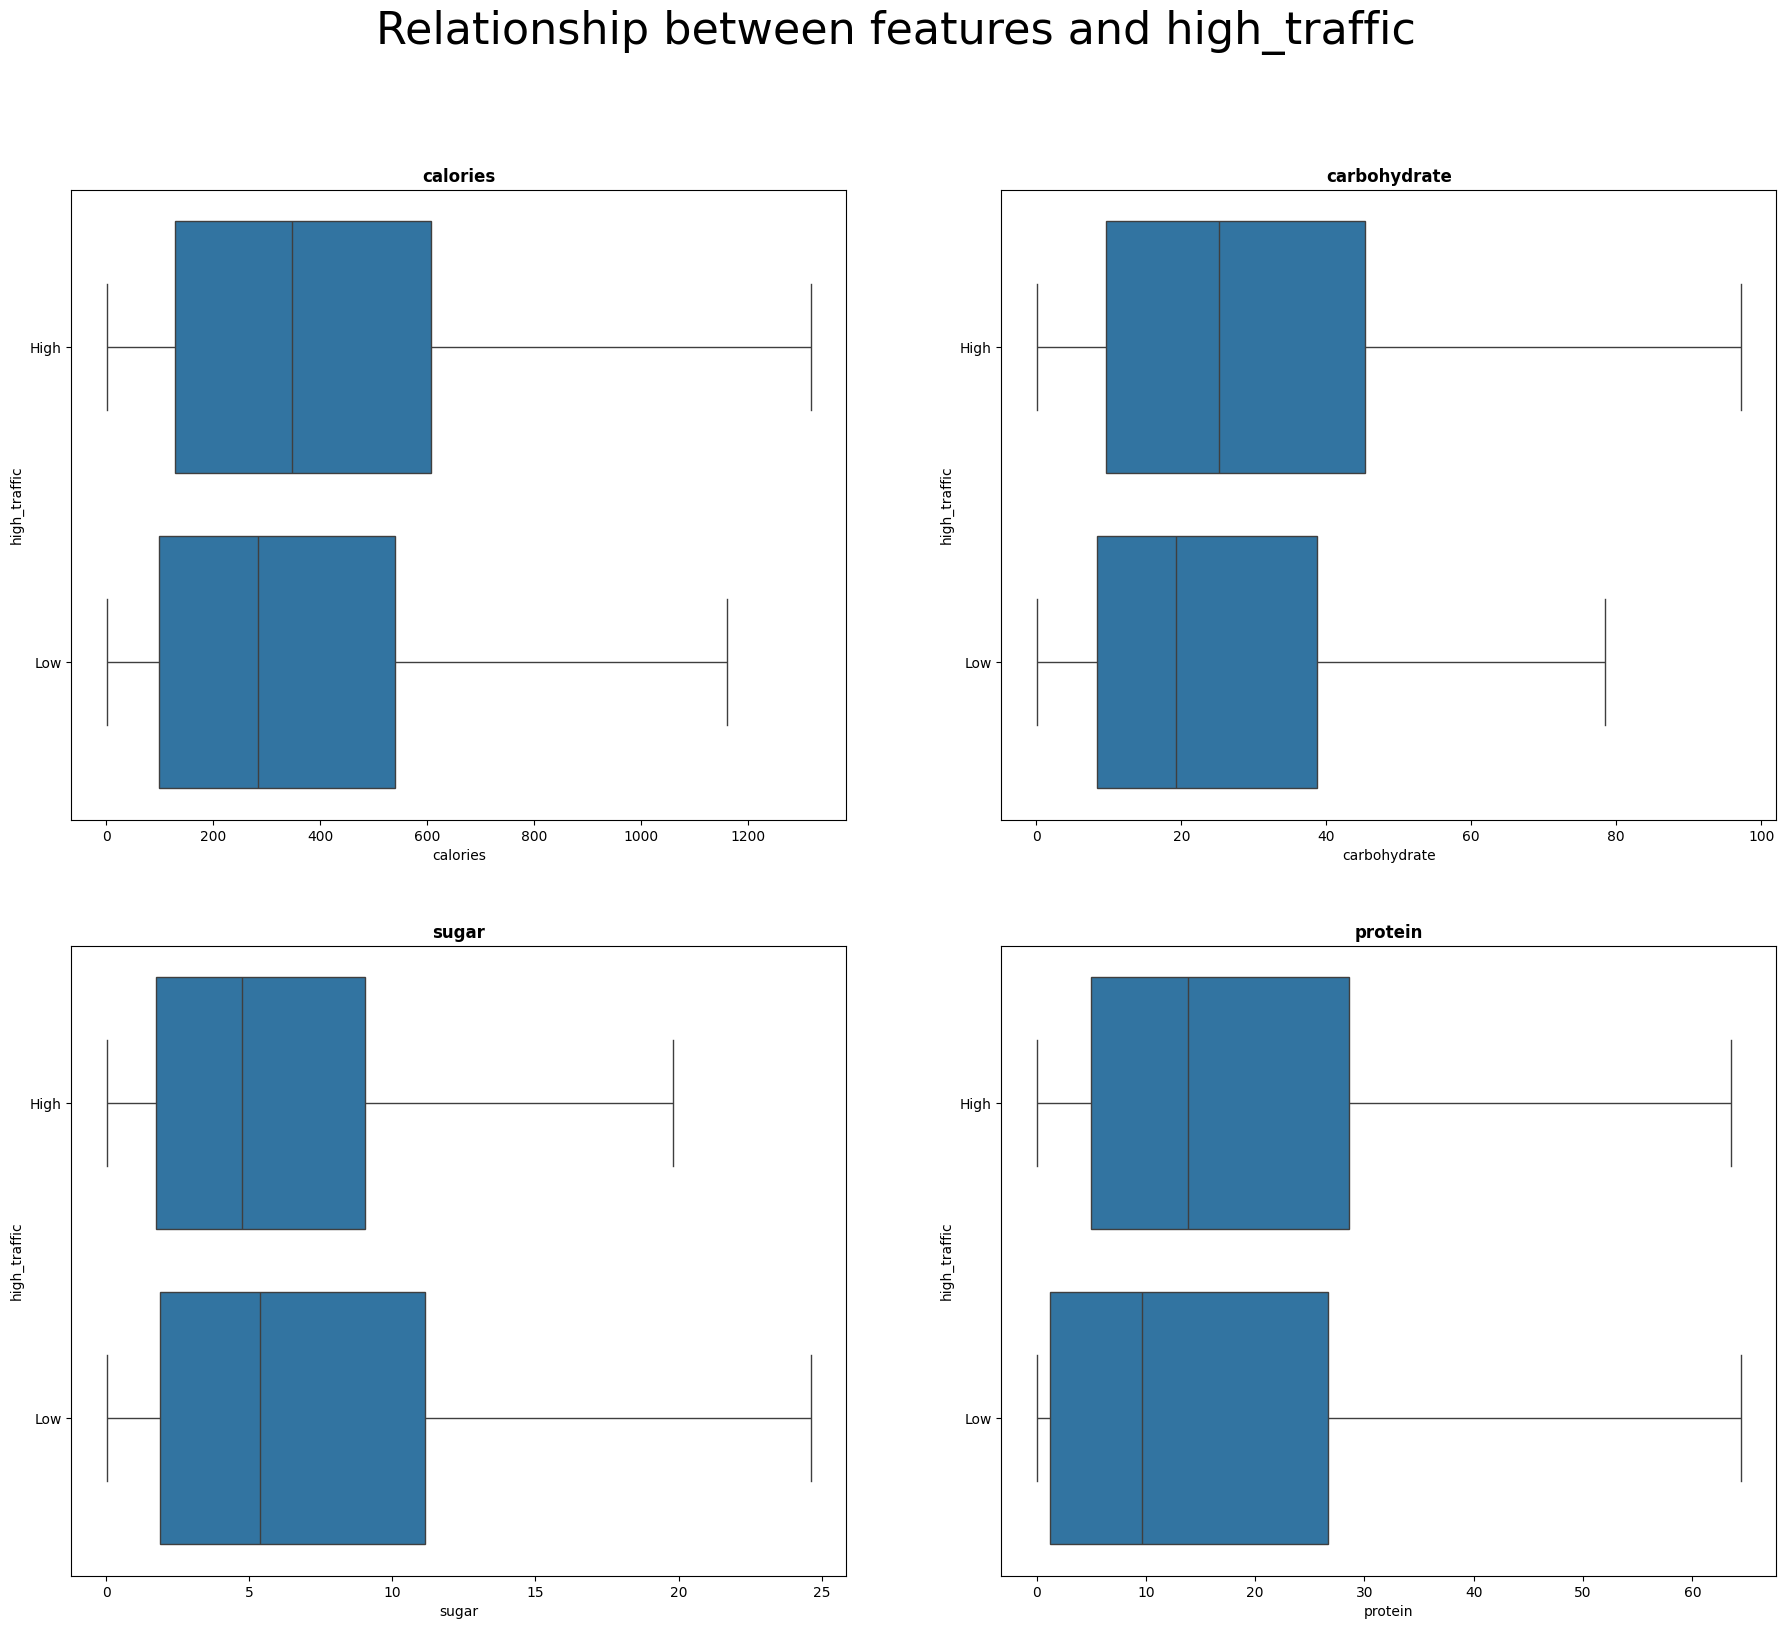

In [29]:
#Represent the relationship between features and high_traffic
# Categorical variables
cols_to_replace = ['calories', 'carbohydrate', 'sugar', 'protein']
def plot_box(df, ax, col_name, target='high_traffic'):
    ax.set_title(col_name,fontweight ="bold")
    sns.boxplot(ax=ax,data=df,x=col_name, y=target, showfliers=0)

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(2,2)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
axes = [ax1,ax2,ax3,ax4]


for ax, col_name in zip(axes, cols_to_replace):
    plot_box(df, ax, col_name)

fig.suptitle('Relationship between features and high_traffic',fontsize=32)
plt.show()

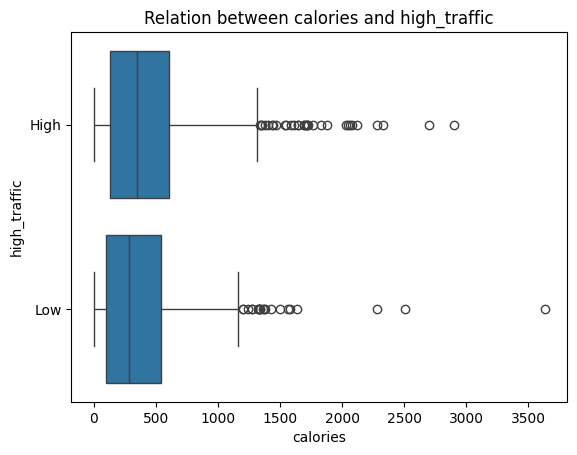

In [30]:
sns.boxplot(data=df, x='calories', y='high_traffic')
plt.title('Relation between calories and high_traffic')
plt.show()

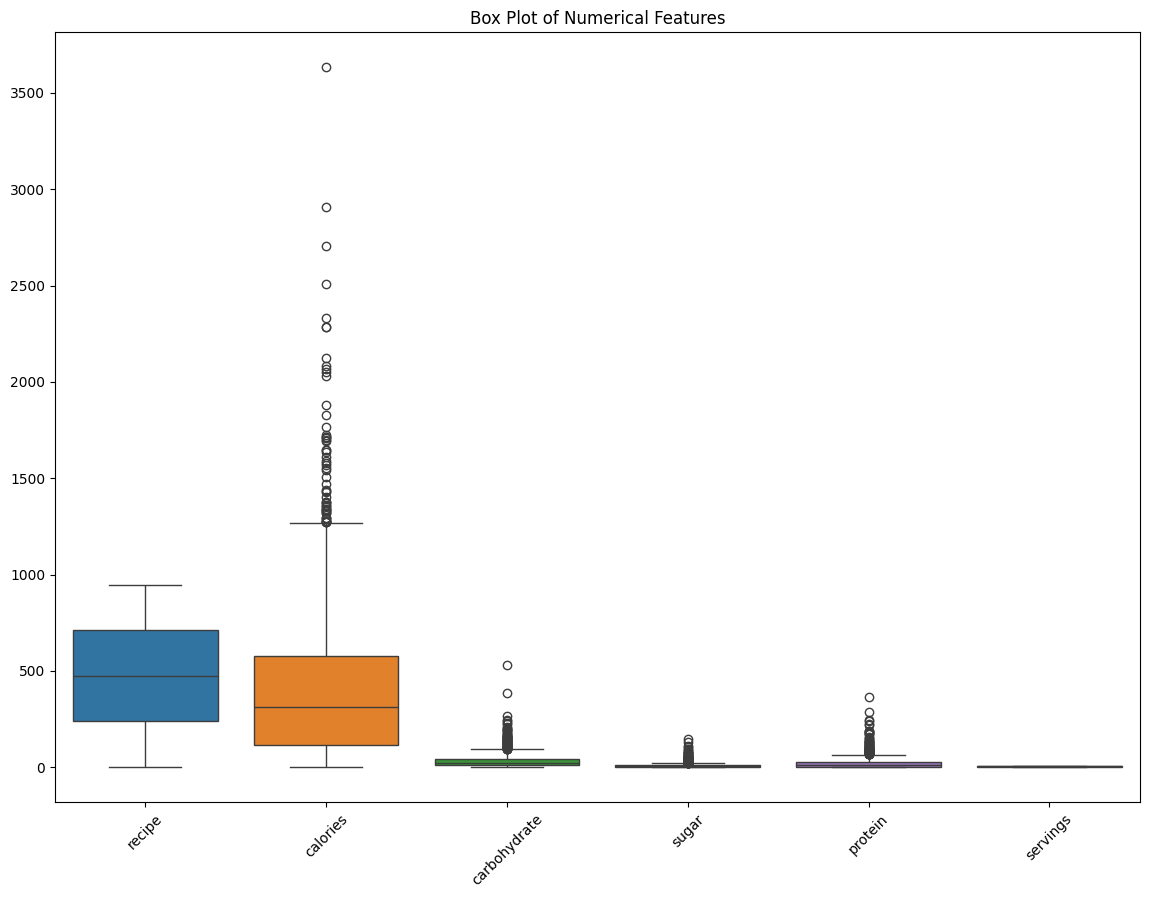

In [31]:
# Box plot for numerical features
plt.figure(figsize=(14, 10))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# 3. Model Development and Evaluation
## 1. Model Selection and Problem Type:
- Several machine learning models are used, including Logistic Regression, KNeighborsClassifier, GaussianNB,  DecisionTreeClassifier,RandomForestClassifier, LinearSVC, Perceptron, and SGDClassifier. 
- Models like Logistic Regression, KNN, GaussianNB, Decision Tree, RandomForest, LinearSVC, Perceptron, and SGDClassifier were evaluated.
- The problem was treated as a binary classification task (predicting high vs. low traffic).
- Logistic Regression and SGDClassifier emerged as leading candidates due to their performance metrics. 
- Logistic Regression and SGDClassifier are selected for further optimization using GridSearchCV.
## Model Comparison:
- Models were compared using metrics like F1 score, ROC AUC, accuracy, precision, and recall.
- Notably, these models offer a good balance between complexity and interpretability.
## 3. Model Optimisation and Evaluation:
###    Hyperparameter Tuning:
- GridSearchCV optimized the SGDClassifier, resulting in the best performance with an alpha of 0.1 and a l1_ratio of 0.5 using the log loss function.
- Logistic Regression was optimized with a C of 0.01 and the saga solver.
- The performance of Logistic Regression and SGDClassifier is evaluated on the test set.
- Tested various machine learning models, including Logistic Regression, KNN, GaussianNB, Decision Tree, RandomForest, LinearSVC, Perceptron, and SGDClassifier.
- Logistic Regression performed consistently well across metrics, particularly in F1 score (0.7015) and accuracy (76.36%).
- The best parameters for each model are found, with accuracy scores of approximately 75.5% for SGDClassifier and 76.4% for Logistic Regression.
# 4. Business Insights and Metrics:
- The high_prob metric, representing the average predicted probability of high traffic, stands at about 40.52%.
- The Gradient Boosting Classifier, with fine-tuned parameters, outperformed other models on the test set with an accuracy of 85.3%.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats.mstats import winsorize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import os

In [33]:
#WE apply THE  label encoder to all the data, in order to encode 
#the categorical columns (high_traffic and category)
df=df.apply(LabelEncoder().fit_transform)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,0,563,547,441,514,7,3,0
1,1,77,571,52,62,8,2,0
2,2,777,604,214,138,1,0,1
3,3,202,497,623,2,0,2,0
4,4,59,51,63,39,0,2,1


In [34]:
#data scaling making sure to scale only the correct columns
ss_train = StandardScaler()
df[['calories',  'carbohydrate', 
    'sugar',  'protein']] = ss_train.fit_transform(df[['calories', 
                                                       'carbohydrate', 
                                                                    'sugar',  'protein']])
ss_train

StandardScaler()

In [35]:
# data spliting# a 80%-20% split for Training and test set
X=df.drop(['recipe', 'high_traffic'], axis=1)
y=df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0)
print('shape_Training set', X_train.shape)
print('shape_Testing set', X_test.shape)

shape_Training set (757, 6)
shape_Testing set (190, 6)


In [36]:
# create predictions pipeline
def run_pred(X_train, y_train, ml_model,n):
    t0=time.time()
    model = ml_model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    cv_f1 = cross_val_score(model,X_train, y_train, cv=n, scoring='f1')
    cv_f1_weighted = cross_val_score(model,X_train, y_train, cv=n, scoring='f1_weighted')
    cv_roc_auc=cross_val_score(model,X_train, y_train, cv=n, scoring='roc_auc')
    cv_log_loss=cross_val_score(model,X_train, y_train, cv=n, scoring='neg_log_loss')
    cv_accuracy=cross_val_score(model,X_train, y_train, cv=n, scoring='accuracy')
    cv_precison=cross_val_score(model,X_train, y_train, cv=n, scoring='precision')
    cv_recall=cross_val_score(model,X_train, y_train, cv=n, scoring='recall')
    time_taken = time.time()-t0
    print(f'Current baseline is {type(ml_model).__name__}')
    print(f'CV f1 score is {cv_f1.mean()}')
    print(f'CV f1 weighted score is {cv_f1_weighted.mean()}')
    print(f'CV area under the curve is {cv_roc_auc.mean()}')
    print(f'CV accuracy is {cv_accuracy.mean()}')
    print(f'CV precision is {cv_precison.mean()}')
    print(f'CV recall is {cv_recall.mean()}')
    print(f'\n')
    print("Time taken = {}".format(time_taken))
    print(f'\n')
    return y_pred

In [37]:
# run predictions
model_list=model_list=[LogisticRegression(), KNeighborsClassifier(),GaussianNB(),
                       DecisionTreeClassifier(),RandomForestClassifier()
                       ,LinearSVC(), Perceptron(), SGDClassifier()]
for i in model_list:
    y_pred = run_pred(X_train, y_train,i,10)

Current baseline is LogisticRegression
CV f1 score is 0.6872462445455902
CV f1 weighted score is 0.7400959455791032
CV area under the curve is 0.8344710404654304
CV accuracy is 0.7398421052631579
CV precision is 0.6740313679610379
CV recall is 0.7088172043010754


Time taken = 0.489105224609375


Current baseline is KNeighborsClassifier
CV f1 score is 0.6205811203703628
CV f1 weighted score is 0.7050462230313052
CV area under the curve is 0.7719719495091164
CV accuracy is 0.7081403508771931
CV precision is 0.6559651867373006
CV recall is 0.5939784946236559


Time taken = 0.4096355438232422


Current baseline is GaussianNB
CV f1 score is 0.7041371395708385
CV f1 weighted score is 0.7440147170735023
CV area under the curve is 0.8267098332554152
CV accuracy is 0.7424736842105263
CV precision is 0.664672823293513
CV recall is 0.7541935483870968


Time taken = 0.28339576721191406


Current baseline is DecisionTreeClassifier
CV f1 score is 0.623673092488156
CV f1 weighted score is 0.69733080

In [38]:
# leave only best models
model_list=model_list=[LogisticRegression(),LinearSVC(), SGDClassifier()]

for i in model_list:
   run_pred(X_train, y_train,i,10)

Current baseline is LogisticRegression
CV f1 score is 0.6872462445455902
CV f1 weighted score is 0.7400959455791032
CV area under the curve is 0.8344710404654304
CV accuracy is 0.7398421052631579
CV precision is 0.6740313679610379
CV recall is 0.7088172043010754


Time taken = 0.4788541793823242


Current baseline is LinearSVC
CV f1 score is 0.6880430388296812
CV f1 weighted score is 0.7343038267885154
CV area under the curve is 0.834100773985767
CV accuracy is 0.7332807017543861
CV precision is 0.6608217409830314
CV recall is 0.7251612903225807


Time taken = 1.9646706581115723


Current baseline is SGDClassifier
CV f1 score is 0.5713060232497169
CV f1 weighted score is 0.7127824203983086
CV area under the curve is 0.77974162381175
CV accuracy is 0.6583508771929825
CV precision is 0.6407720043150724
CV recall is 0.5603225806451613


Time taken = 0.409024715423584




In [39]:
model = SGDClassifier()
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'l1_ratio': [0, 0.15, 0.5, 0.85, 1],
              'max_iter': [1000, 5000, 10000],
              'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge']}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
best_model_sgd = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best: 0.764883 using {'alpha': 0.01, 'l1_ratio': 0, 'loss': 'log', 'max_iter': 10000, 'penalty': 'l1'}


In [40]:
# run grid search to improve results
model = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'fit_intercept': [True, False],
              'class_weight': [None, 'balanced']}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
best_model_logreg = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best: 0.763667 using {'C': 0.01, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}


In [41]:
# get predictions
y_pred_logreg = run_pred(X_train, y_train,best_model_logreg,10)

Current baseline is LogisticRegression
CV f1 score is 0.7014979867362033
CV f1 weighted score is 0.7625467573365469
CV area under the curve is 0.835365851124617
CV accuracy is 0.7636491228070176
CV precision is 0.7194125740160222
CV recall is 0.6891397849462366


Time taken = 0.3861510753631592




In [42]:
# asses prediction results
def run_pred_test(y_test, y_pred):    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("Y_test Accuracy = {}".format(accuracy))
    print("Y_test ROC Area under Curve = {}".format(roc_auc))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification report:')
    print(classification_report(y_test, y_pred))

In [43]:
y_pred_sgd = run_pred(X_train, y_train,best_model_sgd,10)

Current baseline is SGDClassifier
CV f1 score is 0.6951035280865788
CV f1 weighted score is 0.7490190202651245
CV area under the curve is 0.8358262687652589
CV accuracy is 0.7503859649122807
CV precision is 0.7038629240289856
CV recall is 0.7311827956989247


Time taken = 0.3971896171569824




In [44]:
#asses the results logreg
from sklearn.metrics import roc_auc_score
run_pred_test(y_test,y_pred_logreg)

Y_test Accuracy = 0.7578947368421053
Y_test ROC Area under Curve = 0.7496383799421409
Confusion matrix:
[[95 27]
 [19 49]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       122
           1       0.64      0.72      0.68        68

    accuracy                           0.76       190
   macro avg       0.74      0.75      0.74       190
weighted avg       0.77      0.76      0.76       190



In [45]:
#asses the results sgd
run_pred_test(y_test,y_pred_sgd)

Y_test Accuracy = 0.7578947368421053
Y_test ROC Area under Curve = 0.7496383799421409
Confusion matrix:
[[95 27]
 [19 49]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       122
           1       0.64      0.72      0.68        68

    accuracy                           0.76       190
   macro avg       0.74      0.75      0.74       190
weighted avg       0.77      0.76      0.76       190



In [46]:
# create metric
high_prob = best_model_logreg.predict_proba(X)[:, 1].mean()
high_prob

0.4052279254285086

In [47]:
# Logistic Regression
LR = LogisticRegression(random_state=0)
#fitting the model
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
print ('Testing_score_Logistic_Regression',round(LR.score(X_test, y_test),3))

Testing_score_Logistic_Regression 0.758


In [48]:
#Random Forest
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
#fitting the model
RF.fit(X_train, y_train)
RF_y_pred = RF.predict(X_test)

In [49]:
#checking  overfitting
print ('Training_score_Random_Forest',round(RF.score(X_train, y_train),3))
print ('Testing_score_Random_Forest ',round(RF.score(X_test, y_test),3))

Training_score_Random_Forest 0.766
Testing_score_Random_Forest  0.763


In [50]:
# improving the Random Forest model parameters
RF_params = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split= 10,
                                   bootstrap=True,max_features=3,min_samples_leaf=4,random_state=0)
#fitting the model
RF_params.fit(X_train, y_train)
RF_params_y_pred = RF.predict(X_test)

In [51]:
#we also check for overfitting
print ('Training_score_Random_Forest',round(RF_params.score(X_train, y_train),3))
print ('Testing_score_Random_Forest',round(RF_params.score(X_test, y_test),3))

Training_score_Random_Forest 0.897
Testing_score_Random_Forest 0.726


In [52]:
#imporitng the classfier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
print ('Training_GBC_score',round(GBC.score(X_train, y_train),3)) 
print ('Testing_GBC_score',round(GBC.score(X_test, y_test),3)) 

Training_GBC_score 0.877
Testing_GBC_score 0.705


In [54]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

cv = GridSearchCV(GBC,parameters,cv=5)

cv.fit(X_train, y_train)

print(cv.best_estimator_)

best=cv.best_estimator_
best.fit(X_train, y_train)
print(' Training_GBC_score',round(best.score(X_train, y_train),3)) 
print(' Testing_GBC_score',round(best.score(X_test, y_test),3)) 

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)
 Training_GBC_score 0.764
 Testing_GBC_score 0.758


In [55]:
# Finding the best random state split for the best model of GBC**¶
best_scores={}
for x in range (1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20,
                                                        random_state=x)
    GBC = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05,
                                     max_depth=1,
                                     random_state=x).fit(X_train, y_train);
    best_scores[x]=round(GBC.score(X_test, y_test),3)

best_random_state=max(best_scores, key=best_scores.get)
print('Best_testing_score:',max(best_scores.values()))
print('Best_testing_score at random state : ',best_random_state)

Best_testing_score: 0.853
Best_testing_score at random state :  480


In [56]:
#WE now train the best model at the best random state
#Check it out
X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                                    test_size=0.20,
                                                    random_state=best_random_state)
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05,
                                 max_depth=1,
                                 random_state=best_random_state).fit(X_train, 
                                                                     y_train)
print (' Testing GBC score',round(clf.score(X_test, y_test),3)*100,'%') 

 Testing GBC score 85.3 %


# 5. Recommendations and Final Summary
- **Model Insights:** With the Gradient Boosting Classifier achieving an 85.3% accuracy score, it seems to be the best model for predicting high traffic. This suggests that the model effectively captures the patterns in the data that correlate with high traffic.
- **Optimization:** The search for the best random state indicates that the model's performance can vary with different splits of the data, emphasizing the importance of a robust cross-validation strategy.
- **Actionable Insights:** The analysis suggests that the business can focus on specific recipe categories and serving sizes that are more likely to draw high traffic, potentially guiding content strategy and promotion efforts.
- The Gradient Boosting Classifier is recommended for deployment due to its superior performance.
- Further refinement could be explored by considering feature engineering, ensemble methods, or deep learning approaches.
- It is advisable to look into the model’s interpretability to understand the driving factors behind high traffic predictions.
## Next Steps:
### To further this analysis, consider the following:
- Investigate the false positives and false negatives to understand where and why the model is making errors.
- Deploy the model in a test environment to assess its real-world performance.
- Consider developing a monitoring system to track model performance over time, as changes in user behavior or website content could affect its accuracy.
- **Feature Engineering:** Can new features be created that might have predictive power, like time-based features (seasonality, time of posting)?
- **Model Interpretability:** How can the model's predictions be interpreted to provide actionable insights for the business?
- **Deployment Strategy:** How will the model be implemented in a production environment to make real-time predictions or inform content strategy?

✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
        . Can you see everything you want us to grade?
        . Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the Certification Dashboard to submit your practical exam report and record your Presenation. 